# Bài 1

In [43]:
import numpy as np
from pandas import *

# reading CSV file
data = read_csv("Admission_Predict.csv")

print(data.columns)


sn = data['Serial No.'].tolist()
gre = data['GRE Score'].tolist()
X1 = np.asarray(gre)

tfl = data['TOEFL Score'].tolist()
X2 = np.asarray(tfl)

unirt = data['University Rating'].tolist()
X3 = np.asarray(unirt)

sop = data['SOP'].tolist()
X4 = np.asarray(sop)

lor1 = data['LOR '].tolist()  
X5 = np.asarray(lor1)

cgpa1 = data['CGPA'].tolist()
X6 = np.asarray(cgpa1)

research_exp = data['Research'].tolist()
X7 = np.asarray(research_exp)


prob_Admit = data['Chance of Admit '].tolist()  
Yt = np.asarray(prob_Admit)


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


a) Phân loại bằng phương pháp hồi quy Logistic

In [44]:
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [45]:
def sigmoid(s):
    return 1 / (1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol=1e-4, max_count=10000):
    # Method to calculate logistic regression by Stochastic Gradient Descent
    # eta: learning rate; tol: tolerance; max_count: maximum iterates
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    
    # Loop of Stochastic Gradient Descent
    while count < max_count:
        # Shuffle the order of data (for stochastic gradient descent).
        # and put into mix_id
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi))
            w_new = w[-1] + eta * (yi - zi) * xi
            count += 1
            # Stopping criteria
            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

In [46]:
data = read_csv("Admission_Predict.csv")
data.drop(labels='Serial No.', axis=1, inplace=True)

#i. Đọc dữ liệu, chọn ra 350 dòng đầu làm dữ liệu training, phần còn lại là dữ liệu test. Đổi các dòng dữ liệu sang dạng cột (thêm .T vào sau – đọc các đoạn code trong ví dụ trước).
gre = data['GRE Score'].tolist()
X1 = np.asarray(gre)
X1_train = np.array([X1[:350]]).T
X1_test = np.array([X1[-50:]]).T
tfl = data['TOEFL Score'].tolist()
X2 = np.asarray(tfl)
X2_train = np.array([X2[:350]]).T
X2_test = np.array([X2[-50:]]).T
unirt = data['University Rating'].tolist()
X3 = np.asarray(unirt)
X3_train = np.array([X3[:350]]).T 
X3_test = np.array([X3[-50:]]).T 
sop = data['SOP'].tolist()
X4 = np.asarray(sop)
X4_train = np.array([X4[:350]]).T
X4_test = np.array([X4[-50:]]).T
lor1 = data['LOR '].tolist()
X5 = np.asarray(lor1)
X5_train = np.array([X5[:350]]).T 
X5_test = np.array([X5[-50:]]).T 
cgpa1 = data['CGPA'].tolist()
X6 = np.asarray(cgpa1)
X6_train = np.array([X6[:350]]).T
X6_test = np.array([X6[-50:]]).T
research_exp = data['Research'].tolist()
X7 = np.asarray(research_exp)
X7_train = np.array([X7[:350]]).T
X7_test = np.array([X7[-50:]]).T
prob_Admit = data['Chance of Admit '].tolist()
Yt = np.asarray(prob_Admit)
y_train = np.array(Yt[:350])
y_test = np.array(Yt[-50:])

In [47]:
from sklearn.discriminant_analysis import StandardScaler

# ii. Sắp xếp dữ liệu để có ma trận dữ liệu X = (X1, X2, ..., X7).
scaler = StandardScaler()
X_train = np.concatenate([X1_train, X2_train, X3_train, X4_train, X5_train, X6_train, X7_train], axis=1)
X_train = scaler.fit_transform(X_train)
X_test = np.concatenate([X1_test, X2_test, X3_test, X4_test, X5_test, X6_test, X7_test], axis=1)
X_test = scaler.transform(X_test)



In [48]:
#iii. Bổ sung cột X0 ≡ 1 vào bên trái của ma trận X để được Xbar.
one = np.ones((X_train.shape[0], 1))
Xbar = np.concatenate((one, X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)),X_test), axis=1)

In [49]:
# iv. Bỏ qua các đoạn code vẽ dữ liệu vì trong ví dụ này chúng ta có số chiều là 7 > 2. Gọi các hàm để thực hiện quá trình tính hệ số bằng hồi quy logistic.
d = (Xbar.T).shape[0]
w_init = np.random.randn(d, 1)

w = logistic_sigmoid_regression(Xbar.T, y_train, w_init, eta=0.05)

#v. In các hệ số kết quả ra màn hình.
print(w[-1])

[[ 1.08762957]
 [ 0.1203306 ]
 [ 0.11322414]
 [ 0.07866573]
 [-0.04119242]
 [ 0.11665418]
 [ 0.34549206]
 [ 0.07903339]]


In [50]:
# vi. Sử dụng các hệ số kết quả, dự đoán cho dữ liệu test và đối chiếu kết quả với dữ liệu đúng. Chú ý ở đây ta chỉ đối chiếu phân loại, không so sánh giá trị của khả năng trúng tuyển.
prob = sigmoid(np.dot(w[-1].T, X_test.T))
# print(prob)
y_true = np.where(y_test >= 0.75, 1, 0)
y_predict = np.where(prob[0] >= 0.75, 1, 0)

In [51]:
# Accuracy, Precission, Recall.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
conf_matrix = confusion_matrix(y_true, y_predict)
# Tính accuracy
accuracy = accuracy_score(y_true, y_predict)

# Tính precision cho từng class
precision_class = precision_score(y_true, y_predict, average=None)

# Tính recall cho từng class
recall_class = recall_score(y_true, y_predict, average=None)

print("Confusion matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision for class 0:", precision_class[0])
print("Precision for class 1:", precision_class[1])
print("Recall for class 0:", recall_class[0])
print("Recall for class 1:", recall_class[1])

Confusion matrix:
[[26  2]
 [ 2 20]]
Accuracy: 0.92
Precision for class 0: 0.9285714285714286
Precision for class 1: 0.9090909090909091
Recall for class 0: 0.9285714285714286
Recall for class 1: 0.9090909090909091


b) Bài tập thực hành: Dự đoán khả năng bằng hồi quy tuyến tính

In [52]:
def qr_householder(A):
    #""" Compute QR decomposition of A using Householder reflection"""
    M = A.shape[0]
    N = A.shape[1]

    # set Q to the identity matrix
    Q = np.identity(M)

    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
        # vector to transform
        x = A[n:, n]
        k = x.shape[0]

        # compute ro=-sign(x0)||x||
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        # compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

        # apply v to each column of A to find R
        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])

        # apply v to each column of Q
        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])

    return Q.transpose(), R

# Linear Regression
def linear_regression(X, y):
    # Closed-form solution
    x_bars = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    Q, R = qr_householder(x_bars) 
    R_pinv = np.linalg.pinv(R) 
    A = np.dot(R_pinv, Q.T) 

    return np.dot(A, y)



y_reg = np.array([y_train]).T
w = linear_regression(X_train, y_reg) # linear regression
w = w.T.tolist()
w



[[0.7252857142857135,
  0.017501042672439286,
  0.01950973687868967,
  0.010681065032402034,
  -0.0043644562186497884,
  0.022485214719154996,
  0.0658519111478396,
  0.010924908779877845]]

In [53]:
y_test_predicted = np.dot(X_test, np.array(w).T)
y_test_predicted

array([[0.69804036],
       [0.78315311],
       [0.61917215],
       [0.59362637],
       [0.52735201],
       [0.64951807],
       [0.78492418],
       [0.60776895],
       [0.54810539],
       [0.64504692],
       [0.78856177],
       [0.89965996],
       [0.91230346],
       [0.63504705],
       [0.75511982],
       [0.83074343],
       [0.72200477],
       [0.51023558],
       [0.50095911],
       [0.58881194],
       [0.6152941 ],
       [0.80914918],
       [0.93176025],
       [0.72704848],
       [0.56543574],
       [0.53653534],
       [0.46896187],
       [0.48077855],
       [0.51480807],
       [0.65029664],
       [0.76881188],
       [0.73803692],
       [0.83114992],
       [0.62436943],
       [0.95470066],
       [0.97824552],
       [0.58988433],
       [0.62853544],
       [0.51661243],
       [0.73375934],
       [0.62043478],
       [0.70746226],
       [0.82709519],
       [0.69808066],
       [0.85112907],
       [0.80139236],
       [0.80325796],
       [0.903

In [54]:
#Tính trung bình bình phương sai số bằng cách lấy tổng bình phương sai khác giữa kết quả tính theo hồi quy và kết nquả thực tế (cột cuối) sau đó chia cho số mẫu.
n_samples = len(y_test)

squared_errors = (y_predict - y_true) ** 2

#MSE
mse = np.sum(squared_errors) / n_samples
print("Mean Squared Error:", mse)

Mean Squared Error: 0.08


c) Bài tập tự thực hành:

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from time import process_time
from sklearn.metrics import classification_report

In [56]:
# Naive Bayes

target = 'Chance of Admit '
x = data.drop(target, axis=1)
y = data[target]
y_clf = np.where(y >= 0.75, int(1), int(0))

x_train, x_test, y_train, y_test = train_test_split(x, y_clf, test_size=50, random_state=42, shuffle=False)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


cls = GaussianNB()
start1 = process_time()
cls.fit(x_train, y_train)  

y_predict = cls.predict(x_test)
end1 = process_time()
print(end1 - start1)
print(classification_report(y_true, y_predict))

0.0
              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.95      0.82      0.88        22

    accuracy                           0.90        50
   macro avg       0.91      0.89      0.90        50
weighted avg       0.90      0.90      0.90        50



In [57]:
# Logistic regression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=50, random_state=42, shuffle=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train_binary = (y_train > 0.72).astype(int)
y_test_binary = (y_test > 0.72).astype(int)
logreg = LogisticRegression()
start2 = process_time()
logreg.fit(X_train, y_train_binary)
y_predict = logreg.predict(X_test)
end2 = process_time()
print(end2 - start2)

print(classification_report(y_true, y_predict))

0.0
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.87      0.91      0.89        22

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



d) Sử dụng thư viện Scikit-Learn

Example 1

In [58]:
# example 1

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
X = X.reshape(-1, 1)  
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

logReg = LogisticRegression()
logReg.fit(X, y)

LogisticRegression()

In [59]:
probabilities = logReg.predict_proba(X)
# Lấy xác suất rơi vào lớp 1
prob_class_1 = probabilities[:, 1]

print("Xác suất rơi vào lớp 1 của tập training:")
print(prob_class_1)

Xác suất rơi vào lớp 1 của tập training:
[0.07138279 0.09292463 0.12012639 0.15393955 0.19515935 0.24423032
 0.24423032 0.30102493 0.36465441 0.43339421 0.50479658 0.57600382
 0.64418908 0.7069871  0.81079769 0.85099224 0.88387081 0.91025975
 0.93111944 0.96001404]


In [60]:
'''Hãy thực hiện lệnh để thu được bộ hệ số, quan sát kết quả chạy và dùng bộ hệ số thu được để chạy dự đoán cho kết
quả thi của các sinh viên với số giờ học sau:
x_test = [2.45, 1.85, 3.75, 3.21, 4.05]'''

x_test = [2.45, 1.85, 3.75, 3.21, 4.05]

x_test = np.array(x_test).reshape(-1, 1)
# Dự đoán xác suất 
probabilities_test = logReg.predict_proba(x_test)

# Lấy xác suất rơi vào lớp 1
prob_class_1_test = probabilities_test[:, 1]

print("Xác suất rơi vào lớp 1 của tập test:")
print(prob_class_1_test)

Xác suất rơi vào lớp 1 của tập test:
[0.4193465  0.26605252 0.76278309 0.63358796 0.81945246]


Example 2

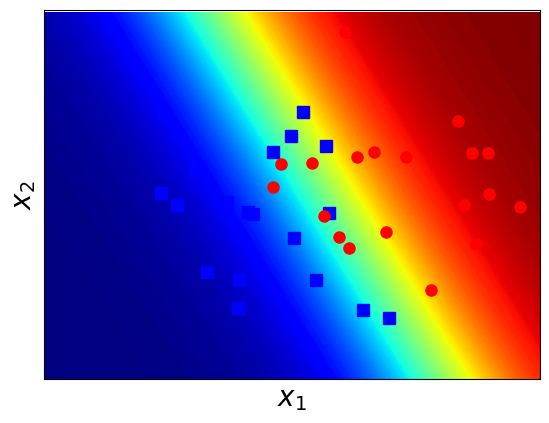

[-6.96181003  1.69487606  1.04023726]


In [61]:
# example 2
from __future__ import division, print_function, unicode_literals
# list of points 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.linear_model import LogisticRegression
from matplotlib.backends.backend_pdf import PdfPages
np.random.seed(22)

means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
filename = 'logistic_2d.pdf'


X = np.concatenate((X0, X1), axis=0)
y = np.concatenate((np.zeros(N), np.ones(N)))

# Fit logistic regression model
logReg = LogisticRegression()
logReg.fit(X, y)

# Get coefficients
w = np.array([logReg.intercept_[0], logReg.coef_[0][0], logReg.coef_[0][1]])

# # Make data.
x1m = np.arange(-1, 6, 0.025) # generate data coord. X1
xlen = len(x1m)
x2m = np.arange(0, 4, 0.025) # generate data coord. X2
x2en = len(x2m)
x1m, x2m = np.meshgrid(x1m, x2m) # create mesh grid X = (X1, X2)
# now assign the parameter w0, w1, w2 from array w which was computed above
w0 = w[0]
w1 = w[1]
w2 = w[2]

# calculate probability zm=P(c|x)=sigmoid(w^Tx)=sigmoid(w0+w1*x1m+w2*x2m)
zm = sigmoid(w0 + w1*x1m + w2*x2m)
# plot contour of prob. zm by the saturation of blue and red
# more red <=> prob. that data point belong to red class is higher & vise versa
CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet')
# finally, plot the data and take a look
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)
plt.show()

print(w)


### Nhận xét
- Bộ tham số tối ưu: khác nhau 
- Kết quả dự đoán: dự đoán phân lớp không khác nhau
- Độ chính xác: gần tương đương <br>
=> Sự khác nhau trong bộ tham số tối ưu có thể do thuật toán tối ưu hóa, tiêu chí dừng, tốc độ học, hiệu chỉnh của mình dùng khác với thư viện


# Bài 2

In [62]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from time import process_time

In [63]:
np.random.seed(42)

data = pd.read_csv("banking.csv")
dict_month = {'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6,'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12}

data['month'] = data['month'].map(dict_month)
# convert field of dayOfweek
dict_day = {'sun' : 1, 'mon' : 2, 'tue' : 3, 'wed' : 4, 'thu' : 5, 'fri' : 6,
'sat' : 7}
data['day_of_week'] = data['day_of_week'].map(dict_day)
# conver binary fields
#default :
data.default.replace({'no' : 0, 'yes' : 1}, inplace = True)
#housing :
data.housing.replace({'no' : 0, 'yes' : 1}, inplace = True)
#loan :
data.loan.replace({'no' : 0, 'yes' : 1}, inplace = True)
# convert categories field by one host coding
marital_dummies = pd.get_dummies(data['marital'], prefix = 'marital')
marital_dummies.drop('marital_divorced', axis=1, inplace=True)
data = pd.concat([data, marital_dummies], axis=1)
job_dummies = pd.get_dummies(data['job'], prefix = 'job')
job_dummies.drop('job_unknown', axis=1, inplace=True)
data= pd.concat([data, job_dummies], axis=1)
education_dummies = pd.get_dummies(data['education'], prefix = 'education')
education_dummies.drop('education_unknown', axis=1, inplace=True)
data = pd.concat([data, education_dummies], axis=1)
contact_dummies = pd.get_dummies(data['contact'], prefix = 'contact')
#contact_dummies.drop('contact_unknown', axis=1, inplace=True)
data = pd.concat([data, contact_dummies], axis=1)
poutcome_dummies = pd.get_dummies(data['poutcome'], prefix = 'poutcome')
#poutcome_dummies.drop('poutcome_unknown', axis=1, inplace=True)
data = pd.concat([data, poutcome_dummies], axis=1)
data['pdays'] = data['pdays'].apply(lambda row: 0 if row == -1 else 1)
data.drop(['job', 'education', 'marital', 'contact', 'poutcome'], axis=1,inplace=True)

In [64]:
index = data[ (data['housing'] == 'unknown') & (data['loan'] == 'unknown') ].index
data.drop(index, inplace=True)

data.default.replace({'unknown': 0}, inplace=True)

p = data.groupby('default').size()

p


default
0    40195
1        3
dtype: int64

In [65]:
target = 'y'
X = data.drop(target, axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=42)

a) Sau đó sử dụng mô hình hồi quy logistic với phần dữ liệu Training, và áp dụng để dự đoán phần Test. Cuối cùng sử dụng các độ đo Accuracy, precision, recall và F1-score (β = 1) để kiểm tra độ chính xác của mô hình nói trên.

In [66]:
cls = LogisticRegression()
start1 = process_time()
cls.fit(X_train, y_train)
end1 = process_time()
print(end1 - start1)

# Dự đoán và tính metrics (Logistic)
y_predict = cls.predict(X_test)
print(classification_report(y_test, y_predict))

0.21875
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7139
           1       0.65      0.35      0.46       901

    accuracy                           0.91      8040
   macro avg       0.78      0.66      0.70      8040
weighted avg       0.89      0.91      0.89      8040



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=["Khong dang ky", "co dang ky"], columns=["khong dang ky", "co dang ky"])
confusion

,khong dang ky,co dang ky
Khong dang ky,6965,174
co dang ky,582,319


b) Sử dụng mô hình Naïve Bayes phù hợp với tập huấn luyện như trên, sau đó chạy dự đoán với tập Test và tính độ chính xác của mô hình, như ý a.

In [70]:
cls = GaussianNB()
start2 = process_time()
cls.fit(X_train, y_train)
end2 = process_time()
print(end2 - start2)

0.03125


In [71]:
# Dự đoán và tính metrics (Naive Bayes)

y_predict = cls.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7139
           1       0.33      0.57      0.42       901

    accuracy                           0.82      8040
   macro avg       0.64      0.71      0.66      8040
weighted avg       0.87      0.82      0.84      8040



c) So sánh thời gian chạy cũng như độ chính xác của hai phương pháp.

Thời gian chạy phương pháp: <br>
Logistic regression: 0.09375 (s) > Naive Bayes: 0.015625 (s)


Độ chính xác: <br>
Logistic regression: 0.91 >  Naive Bayes: 0.82 

=>  Logistic regression có độ chính xác cao hơn. Nhưng Naive bayes có tốc độ nhanh hơn. <br>
=> Precision và recall của cả 2 phương pháp đối với class `1` đều thấp, đối với class `0` thì cao, do chưa có bước xử lý dữ liệu không cân bằng.

# Bài 3

In [72]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

In [77]:
data = pd.read_csv("framingham.csv")

data.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [78]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [79]:
# Imputer for mean
mean_imputer = SimpleImputer(strategy='mean')

# Columns to impute with mean (normally distributed/symmetric)
mean_cols = ['heartRate']

# Impute the columns with mean
data[mean_cols] = mean_imputer.fit_transform(data[mean_cols])

# Imputer for median
median_imputer = SimpleImputer(strategy='median')

# Columns to impute with median (skewed distributions or categorical)
median_cols = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']

# Impute the columns with median
data[median_cols] = median_imputer.fit_transform(data[median_cols])

In [80]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [81]:
target = "TenYearCHD"
x = data.drop(target, axis=1)
y = data[target]

# Chia dữ liệu thành các tập Training – Validation theo tỉ lệ 7:3.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [84]:
# standard scaler
num_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# preprocessor processes numerical data, and the nominal features of this data not needed
preprocessor = ColumnTransformer(transformers=[
    ("num_features", num_transformer, ["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"])
])

In [85]:
# model
logReg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LogisticRegression())
])
logReg.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_features',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'cigsPerDay',
                                                   'totChol', 'sysBP', 'diaBP',
                                                   'BMI', 'heartRate',
                                                   'glucose'])])),
                ('regressor', LogisticRegression())])

In [88]:
from sklearn.metrics import accuracy_score

# Accuracy, Recall and Precision
y_predict = logReg.predict(x_test)
print(classification_report(y_test, y_predict))

accuracy = accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.61      0.07      0.13       188

    accuracy                           0.86      1272
   macro avg       0.73      0.53      0.53      1272
weighted avg       0.82      0.86      0.80      1272

Accuracy: 0.8561320754716981


In [87]:
#confusion matrix
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=["khong", "co"], columns=["khong", "co"])
confusion

,khong,co
khong,1075,9
co,174,14
